In [1]:
import pandas as pd
import random as rd
from numpy import *
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML

df = pd.read_csv("dataun.csv")

<Figure size 432x288 with 0 Axes>

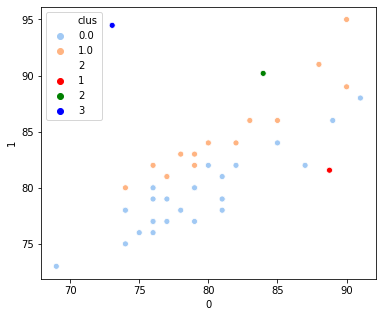

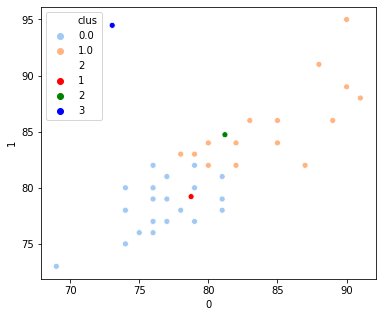

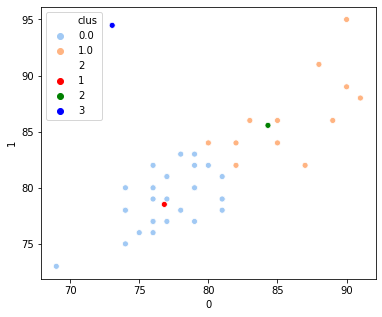

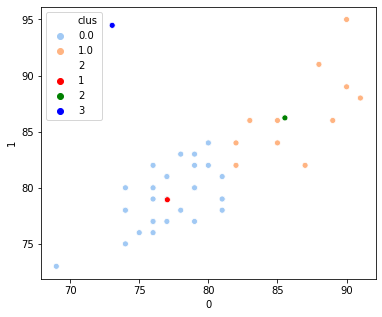

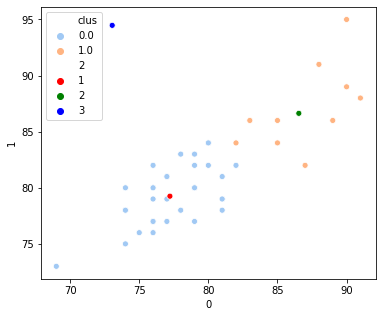

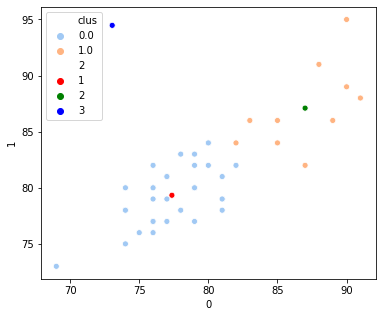

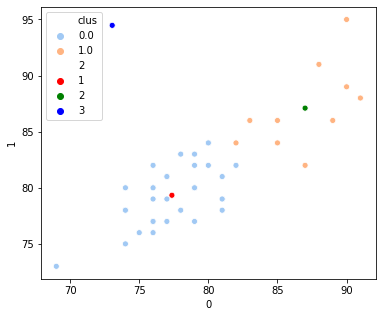

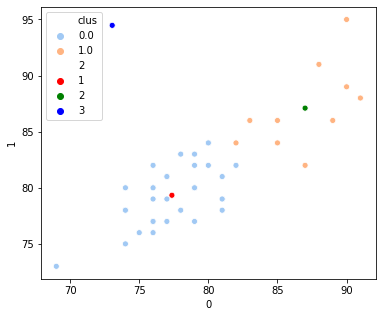

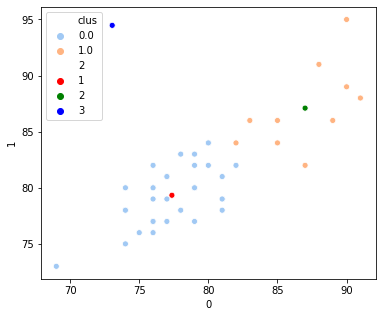

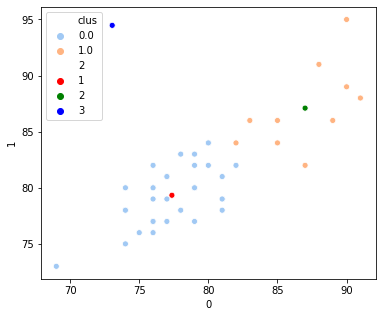

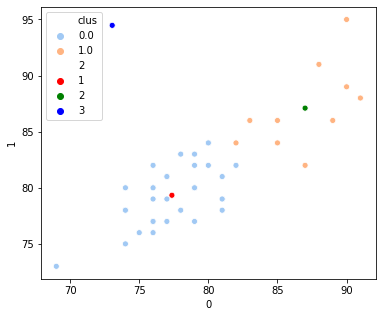

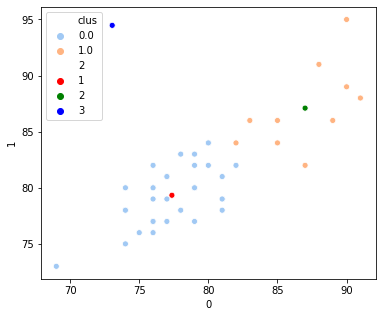

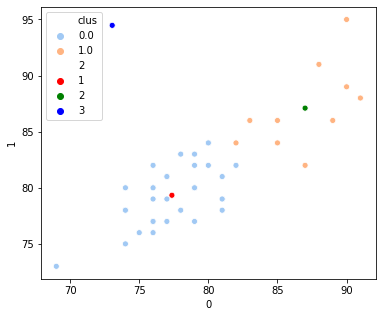

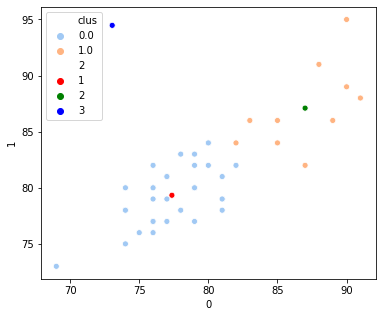

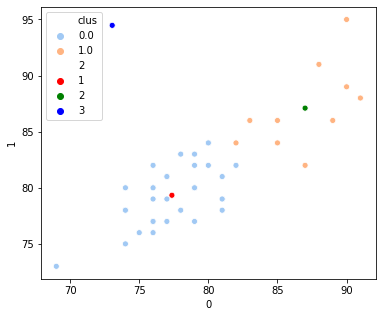

In [2]:
X=df.values
fig = plt.figure()
x=zeros((len(X.T),3))
x_all=[]
for j in range (len(X.T)):
    for k in range (3):
        x[j,k]=rd.uniform(min(X[:,j]),max(X[:,j]))
a=x
epoch=15
x_all=append(x_all,[a])
cx_all=[]
ims=[]
for j in range (epoch):
    cx=zeros((len(X),3))
    #x1=array(x)
    for k in range (len (X)):
        jarak=zeros((3))
        for l in range (3):
            jarak[l]=sqrt(sum((X[k,:]-x[:,l])**2))
        i_min=where(jarak==min(jarak))[0]
        cx[k][i_min[0]]=1
    cx_all.append([cx])
    clus=zeros((len(cx)))
    for i in range (len(cx)):
        clus[i]=where(cx[i]==1)[0][0]
    df['clus']=clus
    datax=pd.DataFrame(x.T)
    datax[2]=[1,2,3]
    fig, g = plt.subplots(figsize=(6,5))
    g =sns.scatterplot(x="UN Mat", y="UN IPA", hue="clus",data=df, palette=("pastel"), legend='full')
    g =sns.scatterplot(x=0, y=1, hue=2,data=datax, palette=['r','g','b'], legend='full')
    ims.append([g])
    for k in range (len(X.T)):
        for l in range (3):
            if sum(cx[:,l])!=0:
                x[k,l]=sum(cx[:,l]*X[:,k])/sum(cx[:,l])
    b=x
    x_all=append(x_all,[b])
   # def animate(i):
    #    g.set_xdata(F[i, :])
#anim = FuncAnimation(fig, animate, interval=100)
#ani = animation.FuncAnimation(fig, animate, interval=100, blit=False, save_count=epoch)
#plt.draw()
#plt.show()
    #camera = Camera(fig)
#animation = camera.animate()    
#h =sns.scatterplot(x)
#g.set(xscale="log")


In [4]:
x_point=x_all.reshape(32,3)
e=[]
for i in range (15):
    i=i*2
    b=(x_point[i]-x_point[i+2])
    c=(x_point[i+1]-x_point[i+3])
    d=sum(sqrt(b**2+c**2))
    e.append(d)
e

[16.411285256266762,
 5.27751308034723,
 1.8651198457048825,
 1.4525631836537705,
 0.8164265756844542,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

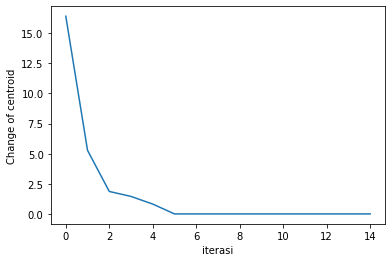

In [5]:
d={'iterasi':list(range(15)),'Change of centroid':e}
data=pd.DataFrame(d)
sns.lineplot(data=data, x="iterasi", y="Change of centroid")